Life Cycle of Machine Learning Project

1) Understanding the problem statement
2) Data Collection
3) Exploratory Data Analysis
4) Data Cleaning
5) Data Pre-Processing
6) Model Training
7) Choose The best Model


We will Start with data collection.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


Import the csv Data As Pandas DataFrame

In [2]:
df = pd.read_csv(r"EasyVisa.csv")


Check the data by loading the first 5 records

In [3]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Check the shape of the dataframe to determine the data is loaded correctly

In [4]:
df.shape

(25480, 12)

Now Lets see the summary of the Dataset

In [5]:
df.describe()       

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Check the datatype of all the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


3) Exploring the dataset

In [7]:
numeric_features = [feature for feature in  df.columns if df[feature].dtype != 'O']
categorical_features = [catf for catf in df.columns if df[catf].dtype == 'O']

print(" We have {} numerical features : {}".format(len(numeric_features), numeric_features))
print(" we have {} categorical features : {}".format(len(categorical_features), categorical_features))

 We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
 we have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [8]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-------------------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
-------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-----------------------

Insights:
1) Column case_id can be dropped as it is having unique values for each column
2) Continent column is highly biased towards asia, hence we can combine other categories o form a single category ie Either Asia Or Not
3) unit_of_wages is important column as most of them are yearly contracts

Now lets do some analysis namely a univariate analysis

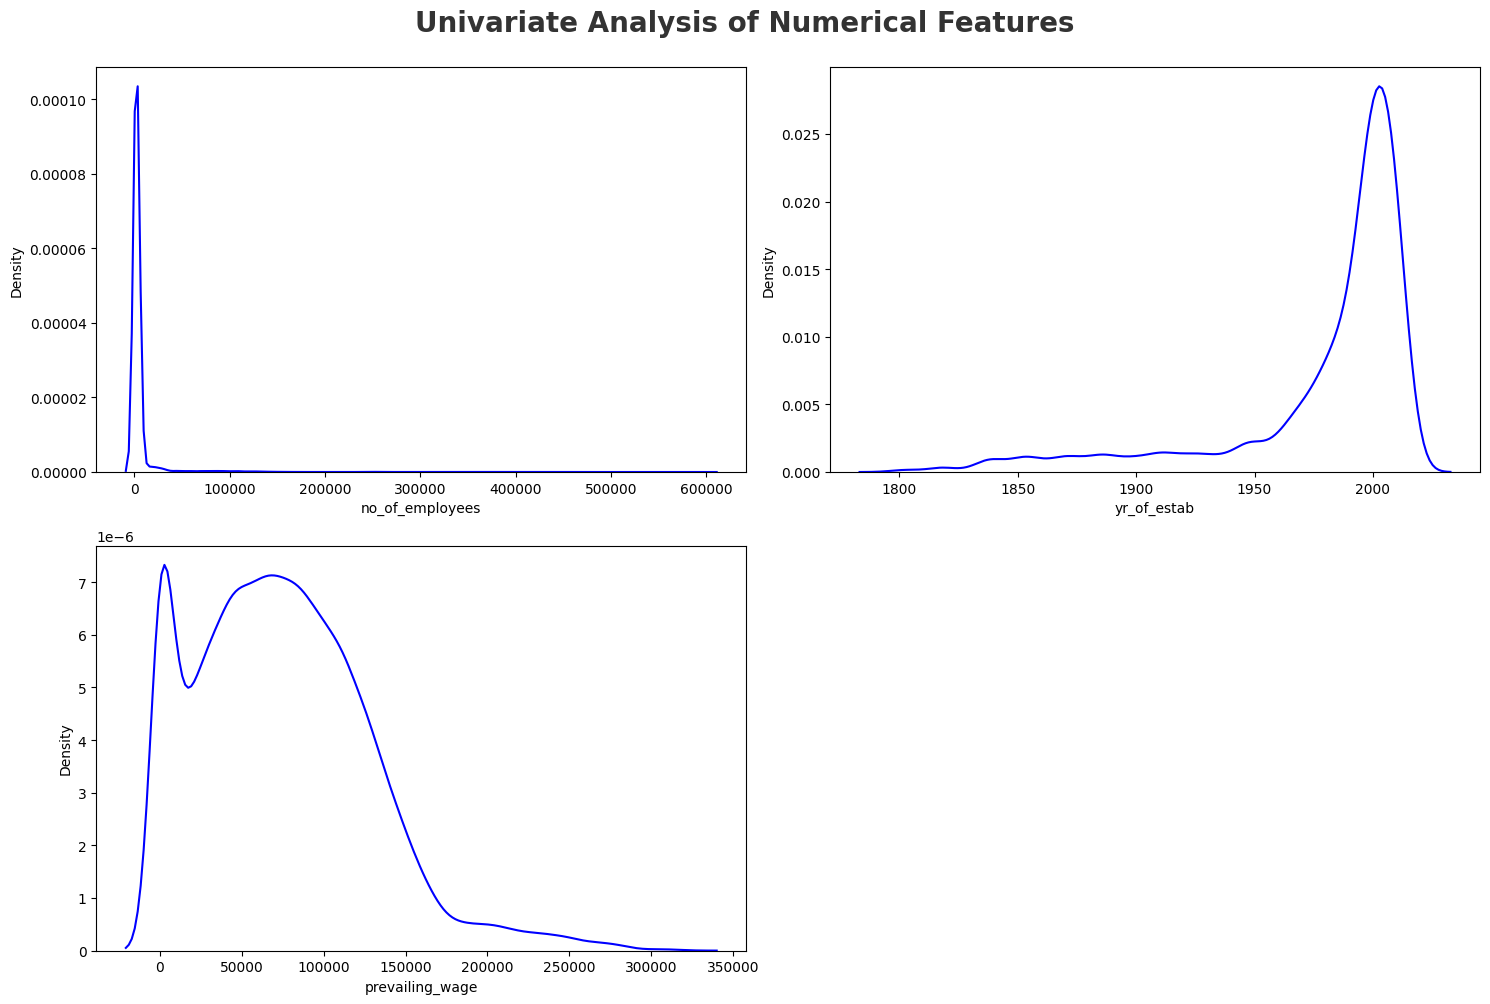

In [9]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range (0, len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numeric_features[i]], color="blue")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Insights:
1) no_of_employees : skewed may be because of outliers
2) yr_of_estab is a discrete feature
3) prevailing_wages is a right skewed distribution

# Categorical Features

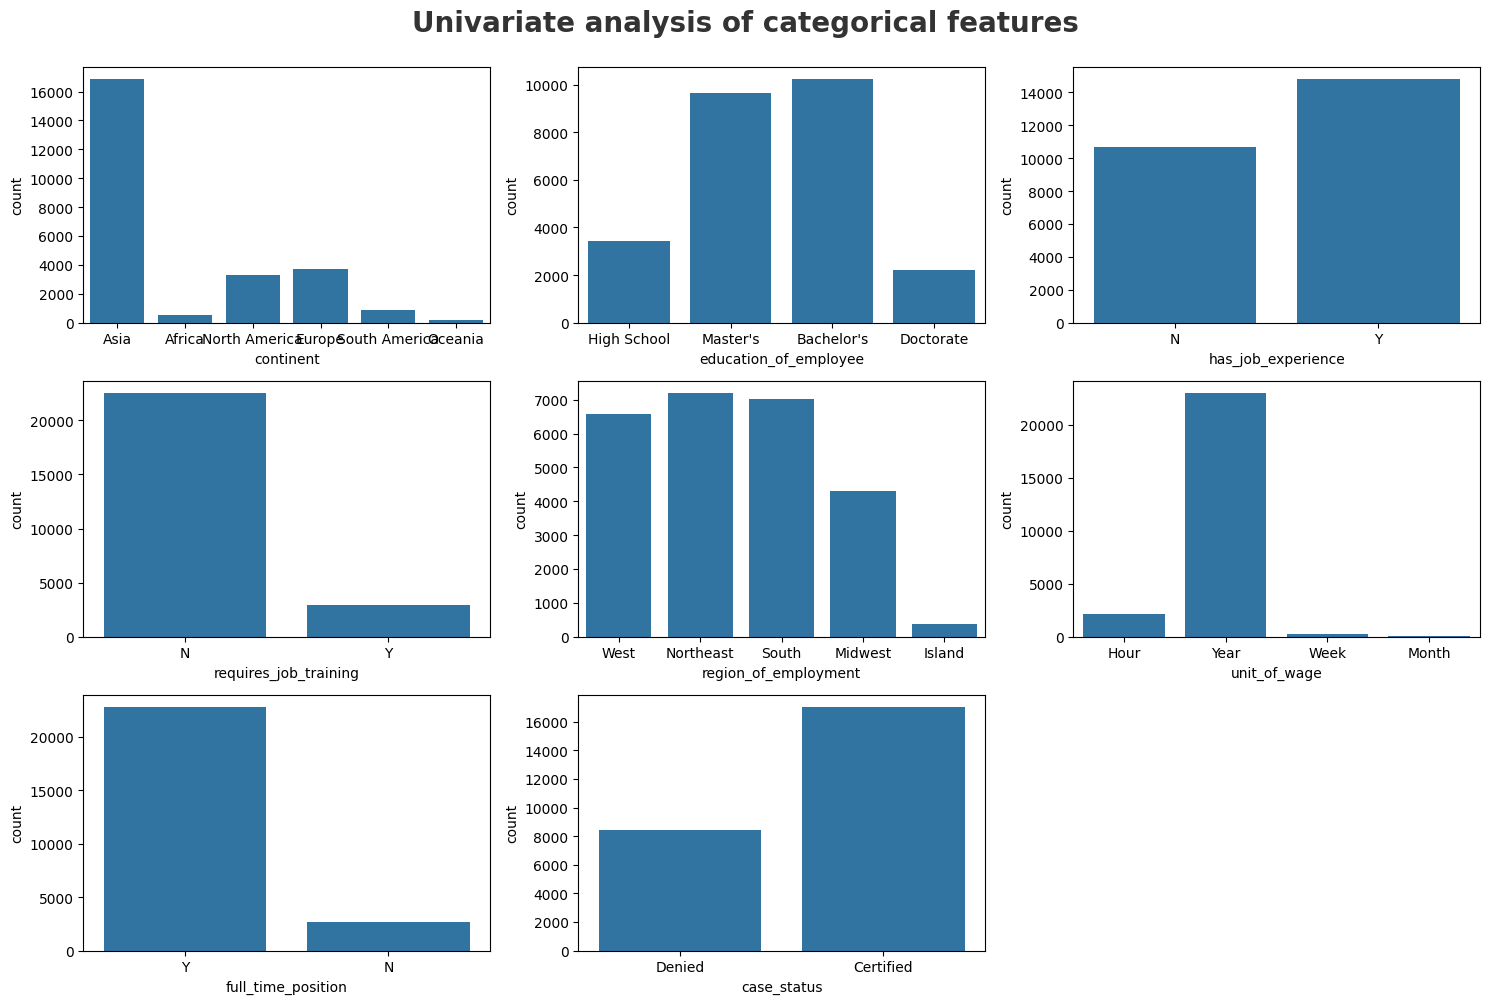

In [10]:
categorical_features.remove('case_id')
plt.figure(figsize=(15,10))
plt.suptitle('Univariate analysis of categorical features', fontsize=20, fontweight="bold", alpha =0.8, y =1.0)

for i in range(0, len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

## Insights
1) Continent column is more skewed towards asia --> more applicants from asia

# Multivariate Analysis

In [11]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features {}'.format(len(discrete_features),discrete_features))
print('We have {} continuous features {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features []
We have 3 continuous features ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


## Check for Multicollinearity

### Perform a chi-squared test - to show the behaviour between two categorical variables
### Correlation between different columns and target column i.e case_status is studied

### H0 : Null Hypothesis i.e No collinearity between feature and target
### H1 : Alternative Hypthesis i.e High Collinearity between feature and target 

In [12]:
from scipy.stats import chi2_contingency

chi_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1] < 0.05:
        chi_test.append("Reject Null Hypothesis")
    else:
        chi_test.append("Fail to Reject Null Hypothesis")

result = pd.DataFrame(data=[categorical_features, chi_test]).T
result.columns = ['Column','Hypothesis Result']
result        



,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


## Insights
### Except the requires_job_training feature rest of the features have high collinearity with confidence level of greater than 95%

In [13]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [14]:
print('Number of continuous features:', len(continuous_features))

Number of continuous features: 3


In [15]:
df.corr('pearson',numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


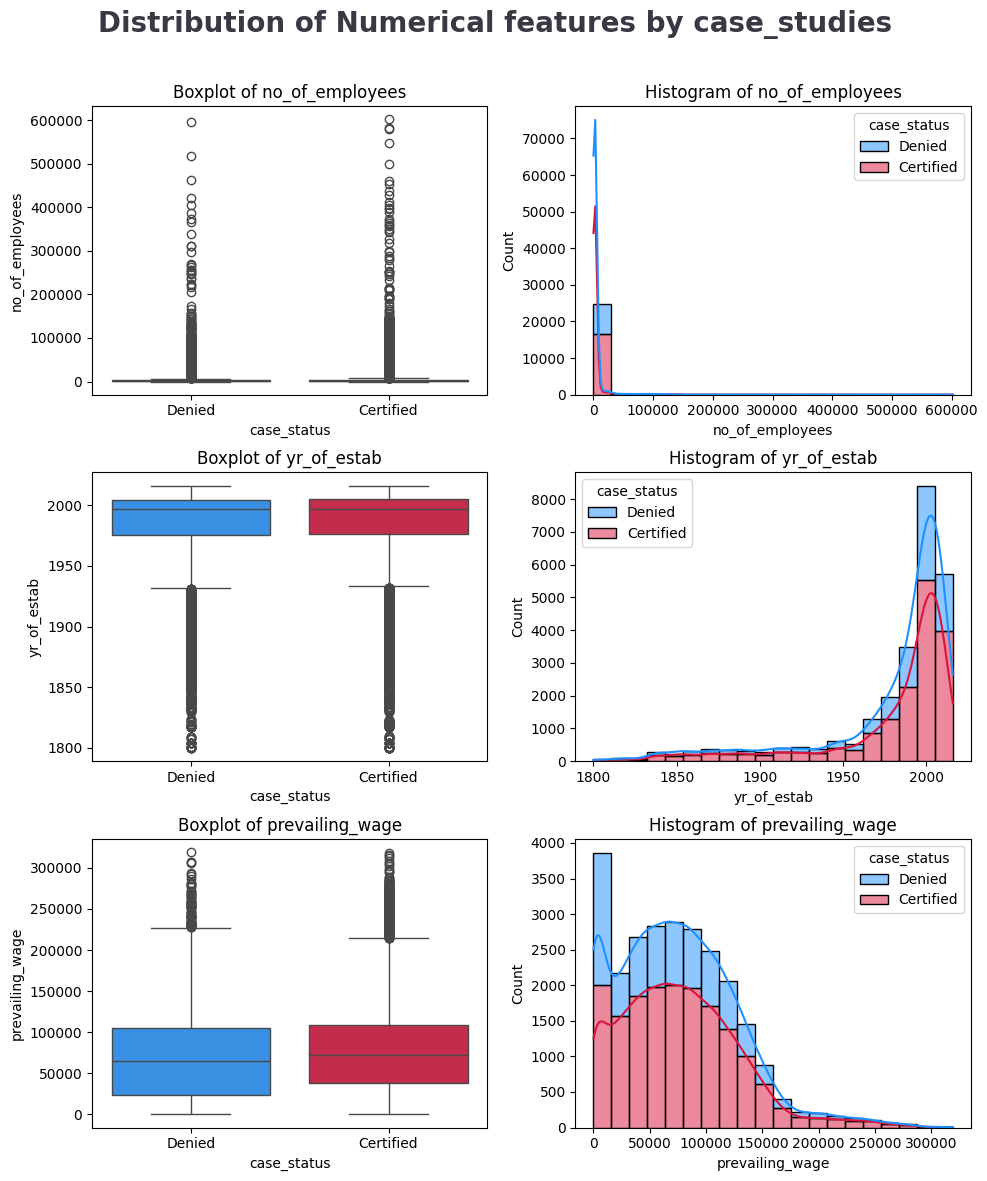

In [16]:
clr1 = ['#1E90FF','#DC143C']
fig,ax = plt.subplots(3,2,figsize=(10,12))
fig.suptitle('Distribution of Numerical features by case_studies',color='#3C3744',fontsize=20,fontweight='bold',ha='center')
for i,col in enumerate(continuous_features):
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1,ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}',fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status',bins=20,kde=True, multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}',fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.90)    


## Visualisation of target features

([<matplotlib.patches.Wedge at 0x7e5d2d19c5d0>,
 [Text(-0.9504959274724624, -0.553676342151499, 'Certified'),
  Text(1.0369045350486599, 0.604010749238391, 'denied')],
 [Text(-0.5184523240758885, -0.30200527753718126, '66.79%'),
  Text(0.604860978778385, 0.3523396037223947, '33.21%')])

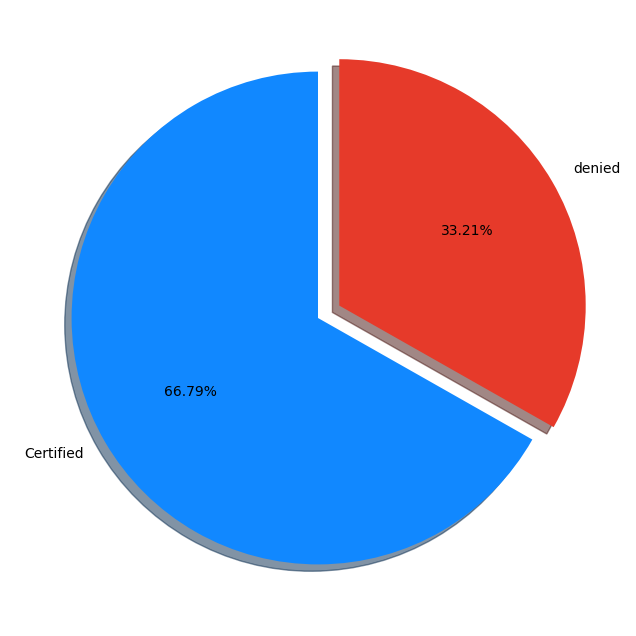

In [18]:
per = df.case_status.value_counts(normalize=True)*100

labels = ['Certified','denied']

fig,ax = plt.subplots(figsize=(10,8))
explode =(0,0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(per, labels=labels,startangle=90,autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)



## Does continent have any impact on visa approval status?

In [19]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

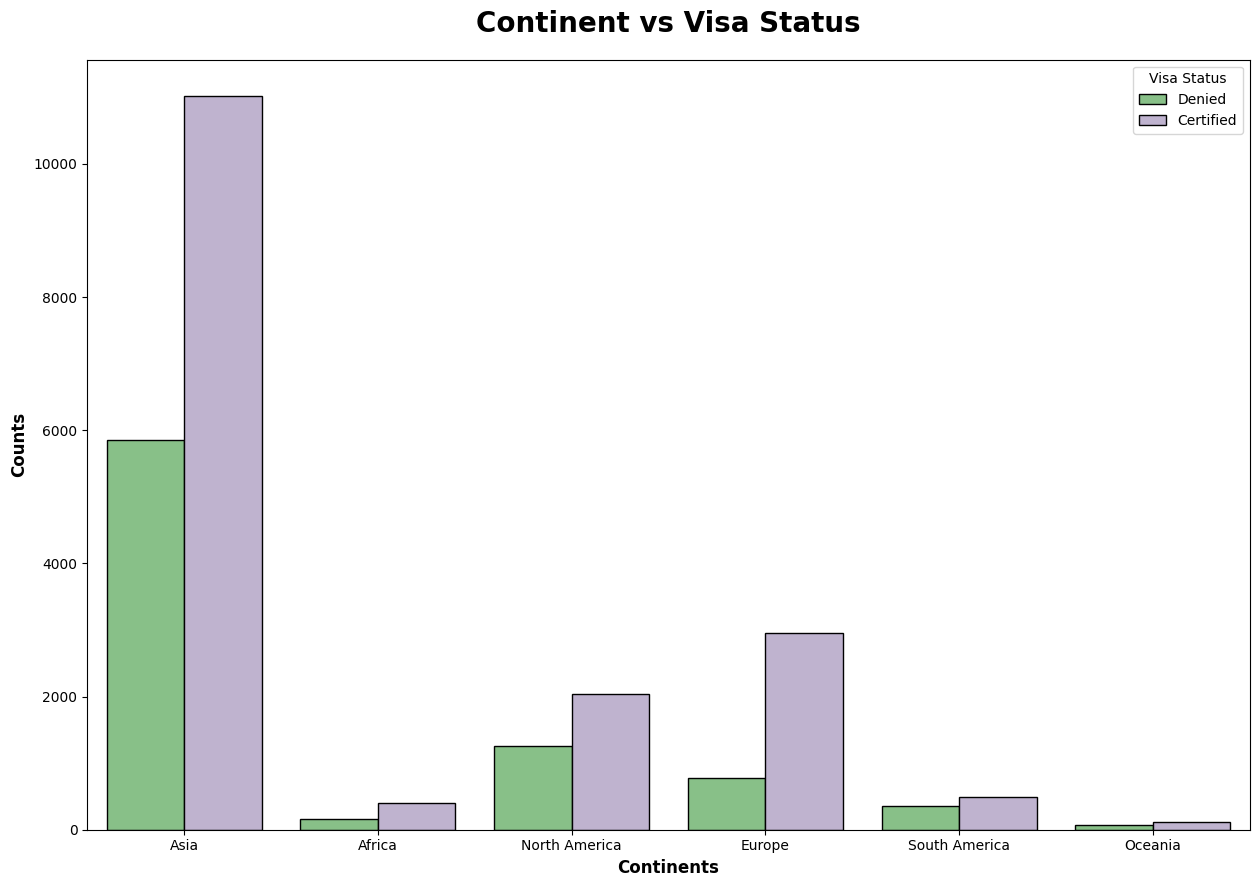

In [26]:
plt.subplots(figsize=(15,10))
sns.countplot(x = "continent", hue="case_status", data=df, ec="black", palette="Accent")
plt.title("Continent vs Visa Status", weight="bold", fontsize=20, pad =20)
plt.xlabel("Continents",weight="bold",fontsize=12)
plt.ylabel("Counts",weight="bold",fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

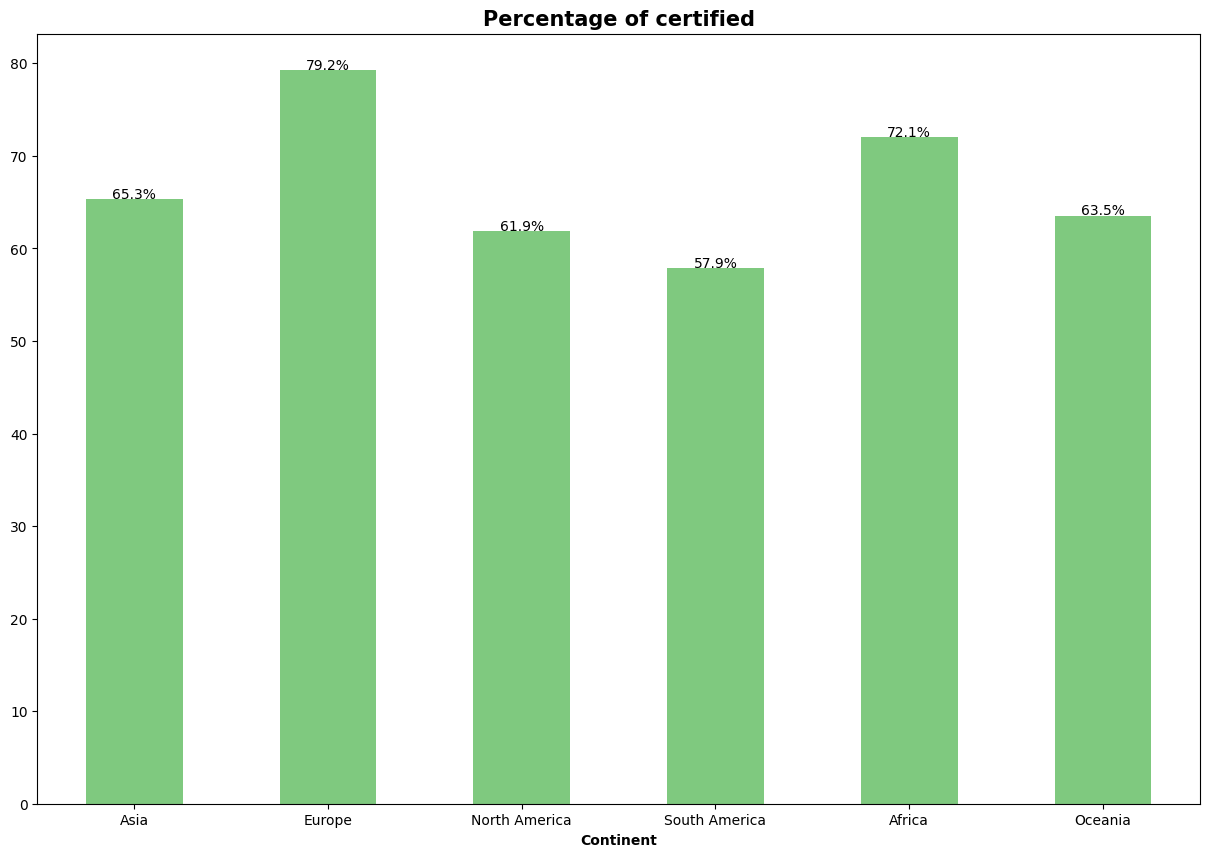

In [24]:
df2 = df.copy()
plt.figure(figsize=(15,10))
(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(kind='bar',stacked=True, colormap="Accent")
plt.title("Percentage of certified", fontsize=15, fontweight="bold")
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel('Continent', fontweight="bold")
plt.xticks(rotation=0)
plt.show()    


## Insights
### 1) Higher chance of being certified if the applicant is from europe or africa
### 2) Asia has highest certified application at 43%
### 3) Asia has the highest applicants

## Does education has any impact on visa approval?

In [25]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

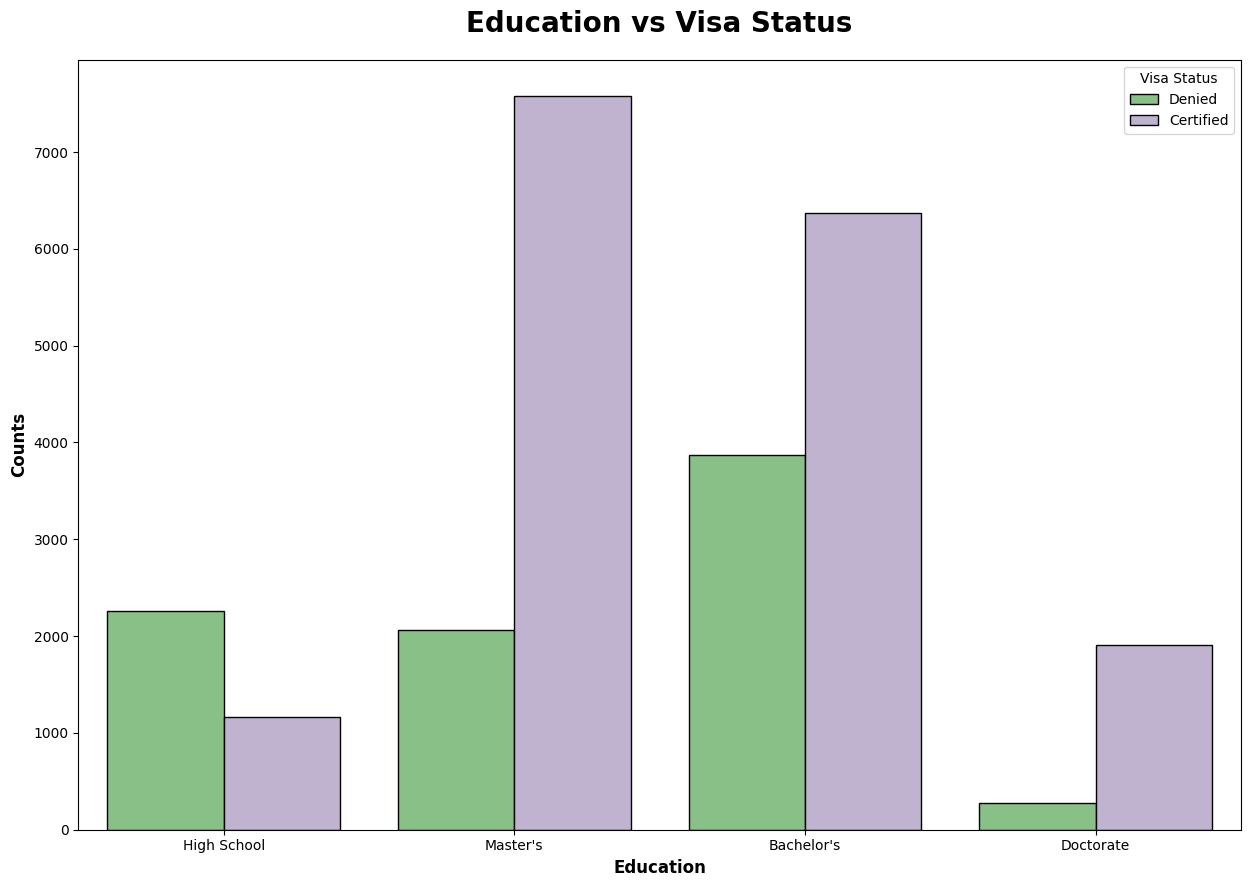

In [27]:
plt.subplots(figsize=(15,10))
sns.countplot(x = "education_of_employee", hue="case_status", data=df, ec="black", palette="Accent")
plt.title("Education vs Visa Status", weight="bold", fontsize=20, pad =20)
plt.xlabel("Education",weight="bold",fontsize=12)
plt.ylabel("Counts",weight="bold",fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

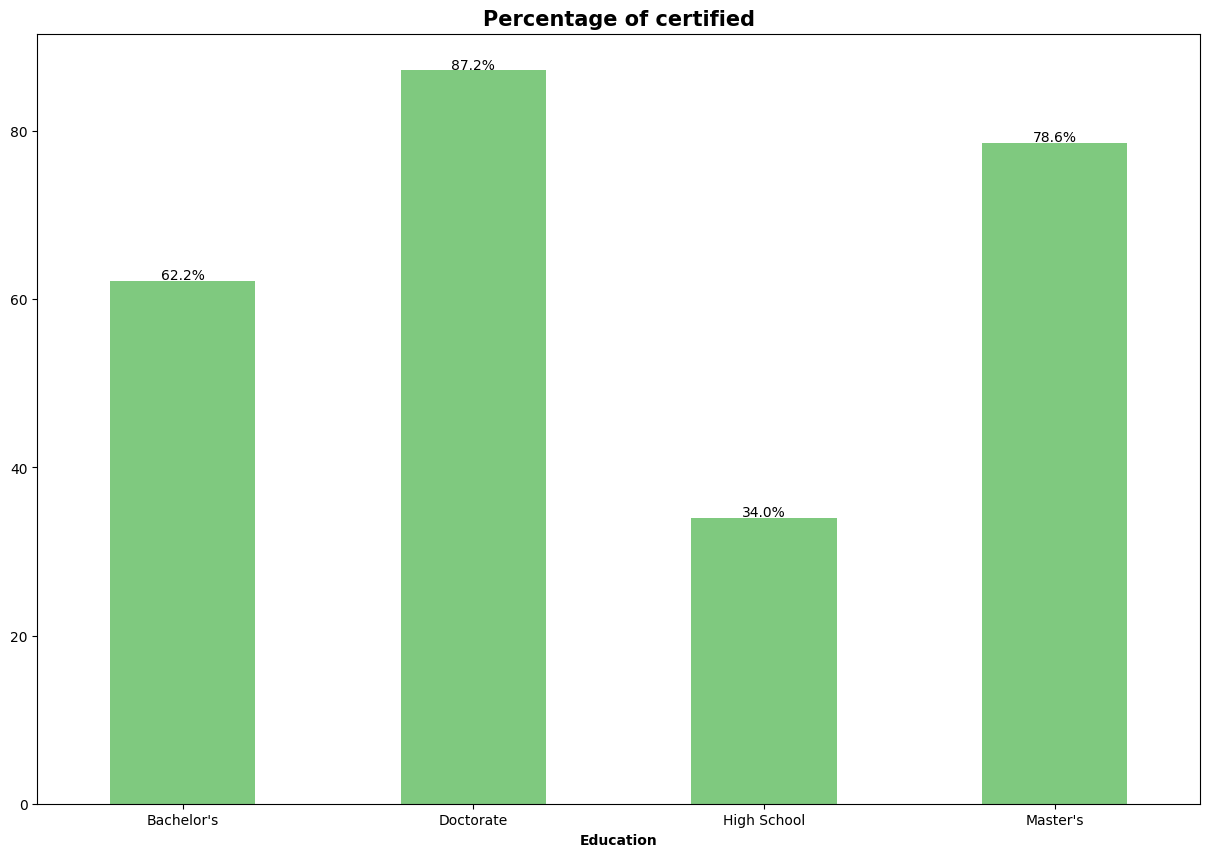

In [28]:
df2 = df.copy()
plt.figure(figsize=(15,10))
(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(kind='bar',stacked=True, colormap="Accent")
plt.title("Percentage of certified", fontsize=15, fontweight="bold")
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel('Education', fontweight="bold")
plt.xticks(rotation=0)
plt.show()    


## Insights
### 1) Being a doctorate has highest chance of being certified followed by masters, bachelors, high school

## Does job experience effect visa application?

In [29]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

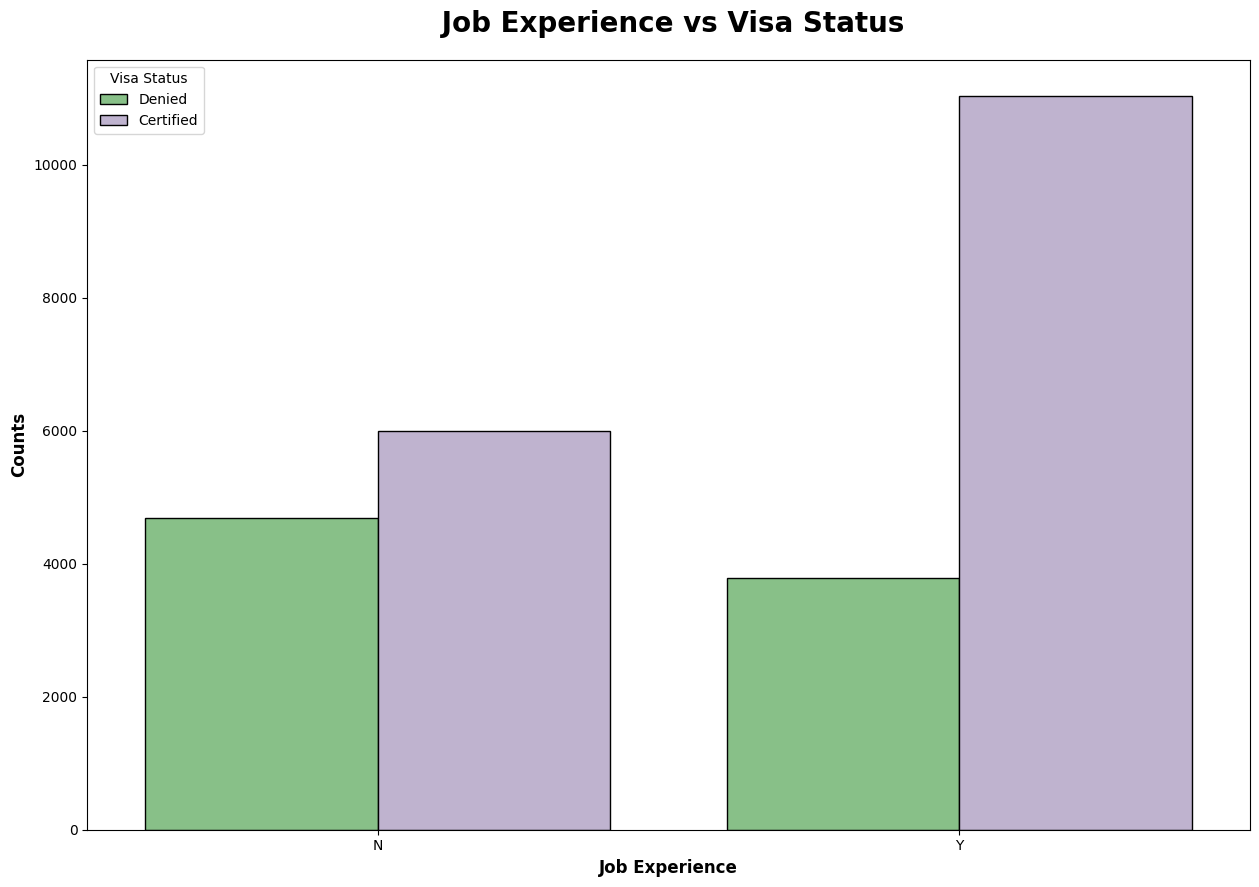

In [30]:
plt.subplots(figsize=(15,10))
sns.countplot(x = "has_job_experience", hue="case_status", data=df, ec="black", palette="Accent")
plt.title(" Job Experience vs Visa Status", weight="bold", fontsize=20, pad =20)
plt.xlabel("Job Experience",weight="bold",fontsize=12)
plt.ylabel("Counts",weight="bold",fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

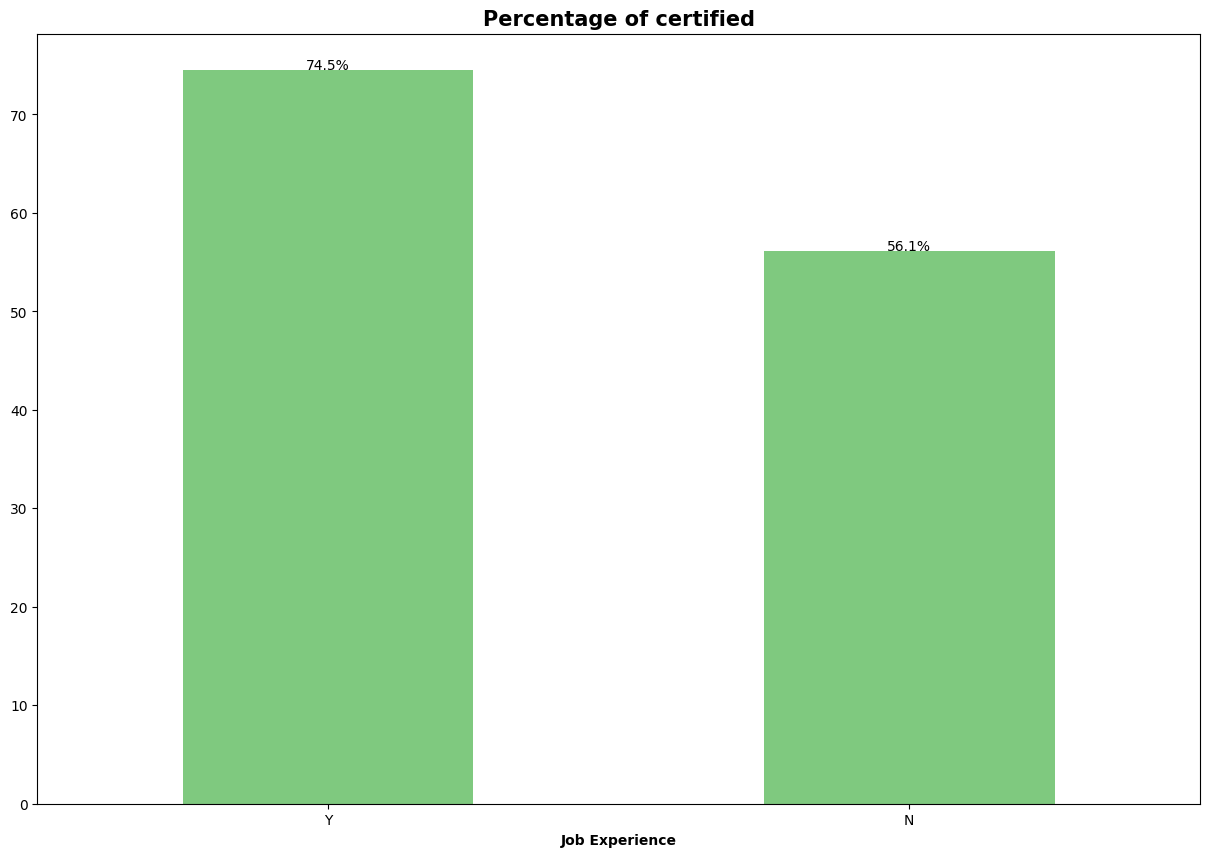

In [31]:
df2 = df.copy()
plt.figure(figsize=(15,10))
(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(kind='bar',stacked=True, colormap="Accent")
plt.title("Percentage of certified", fontsize=15, fontweight="bold")
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel('Job Experience', fontweight="bold")
plt.xticks(rotation=0)
plt.show()    

## Insights
### Having job experience has a 74.5% higher chance of getting approval

In [32]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

## Does Job Training Requirement effects visa status?

In [35]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

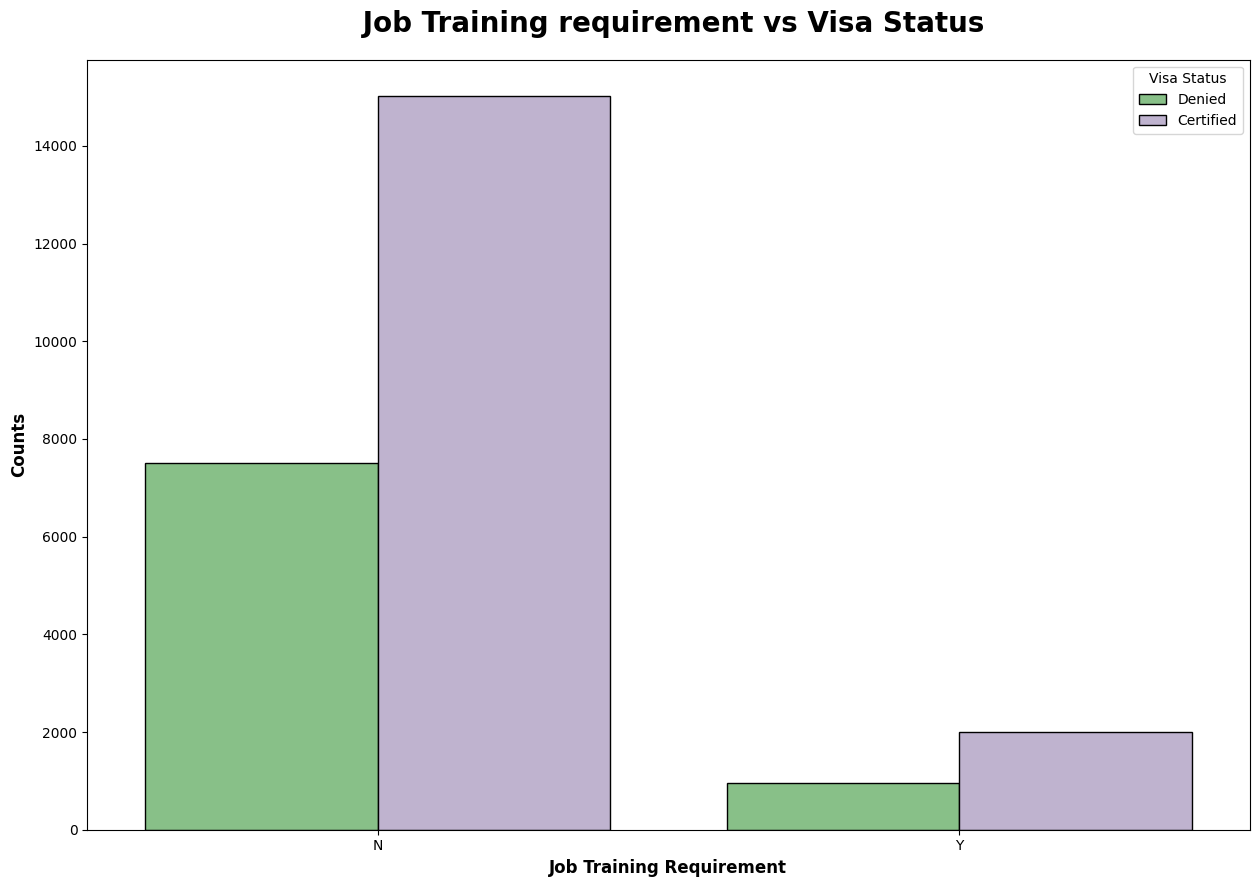

In [36]:
plt.subplots(figsize=(15,10))
sns.countplot(x = "requires_job_training", hue="case_status", data=df, ec="black", palette="Accent")
plt.title(" Job Training requirement vs Visa Status", weight="bold", fontsize=20, pad =20)
plt.xlabel("Job Training Requirement",weight="bold",fontsize=12)
plt.ylabel("Counts",weight="bold",fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

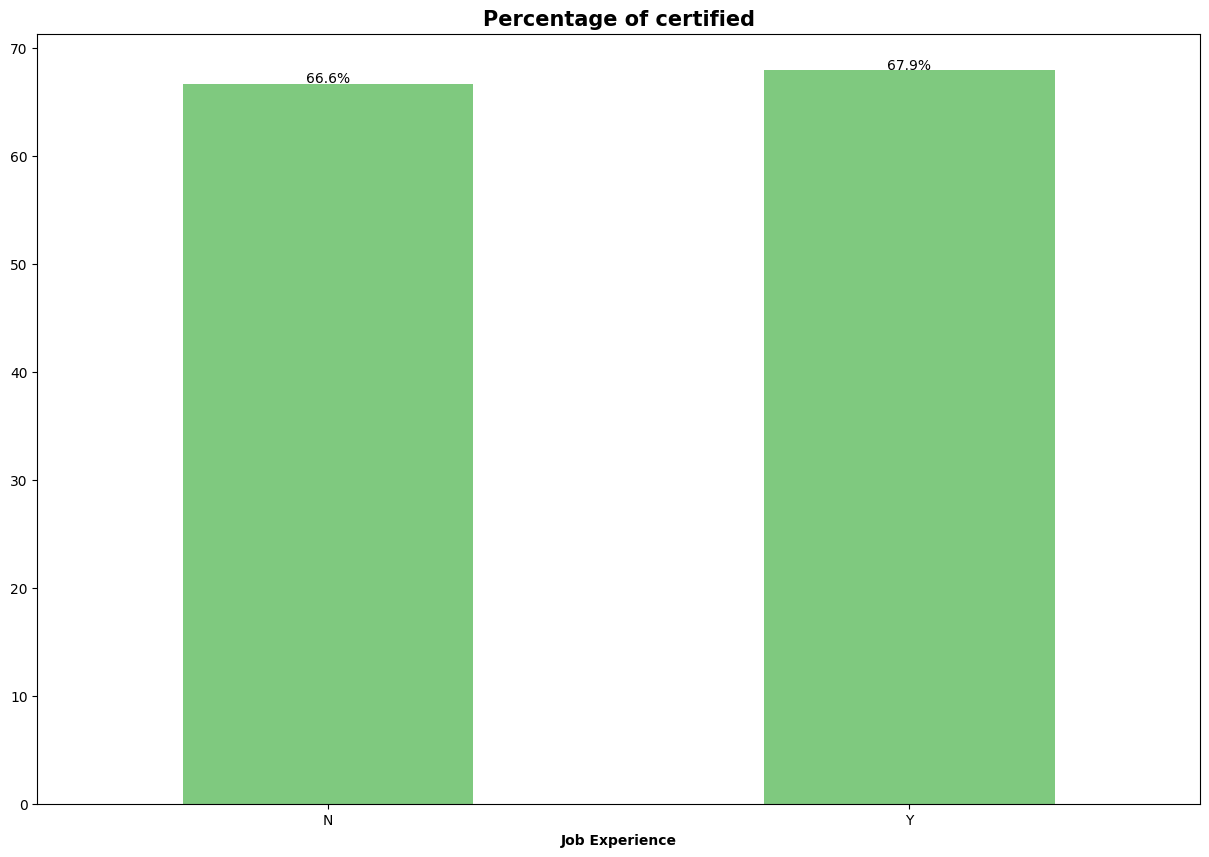

In [37]:
df2 = df.copy()
plt.figure(figsize=(15,10))
(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(kind='bar',stacked=True, colormap="Accent")
plt.title("Percentage of certified", fontsize=15, fontweight="bold")
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel('Job Experience', fontweight="bold")
plt.xticks(rotation=0)
plt.show()    

## Insights
### No statistically significant edge for people requiring job training or not.

## Does the number of employees of employer has any impact on Visa Status?

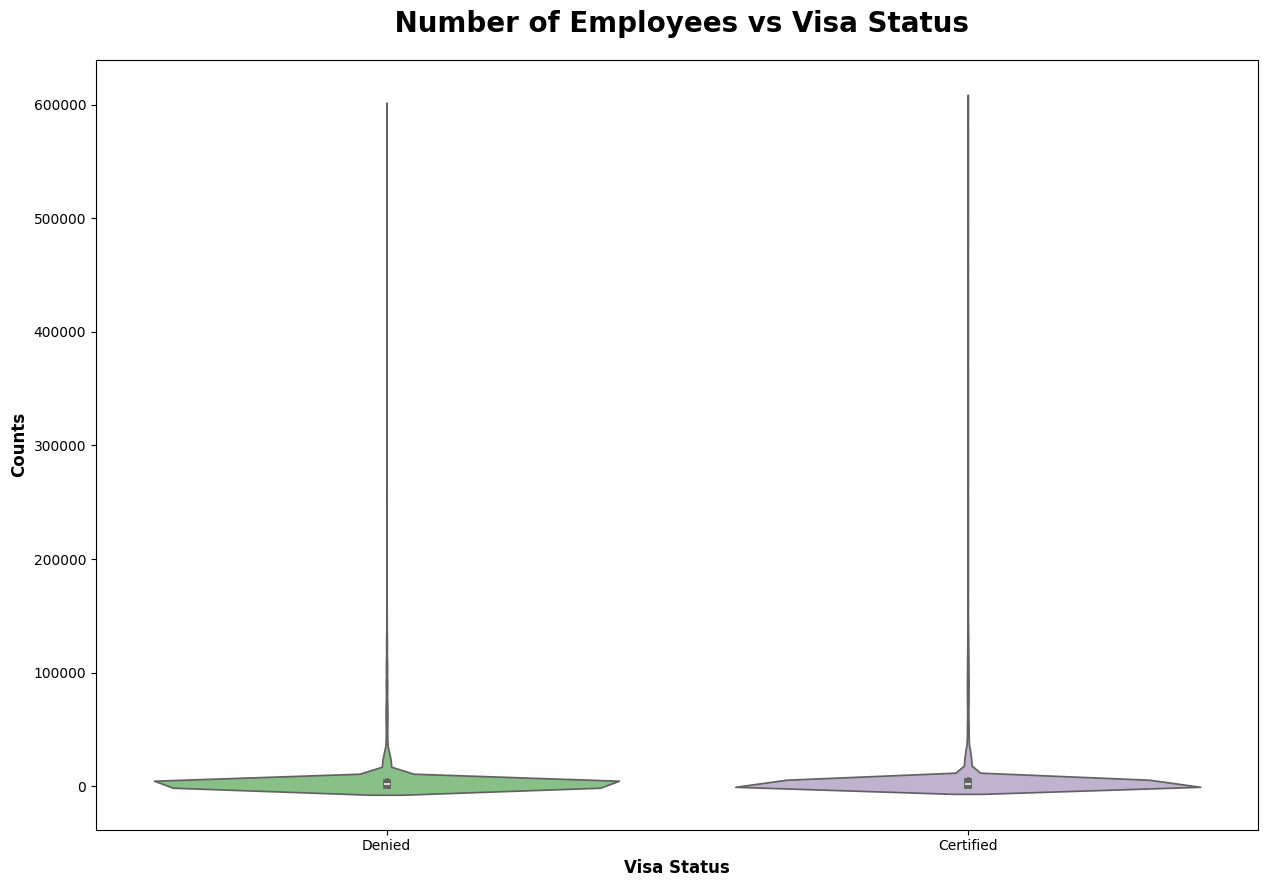

In [41]:
plt.subplots(figsize=(15,10))
sns.violinplot(x = "case_status", y="no_of_employees", data=df, palette="Accent")
plt.title(" Number of Employees vs Visa Status", weight="bold", fontsize=20, pad =20)
plt.xlabel("Visa Status",weight="bold",fontsize=12)
plt.ylabel("Counts",weight="bold",fontsize=12)
plt.ylim()
plt.show()

## Does duration of employment contract affect visa status?

In [42]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [43]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

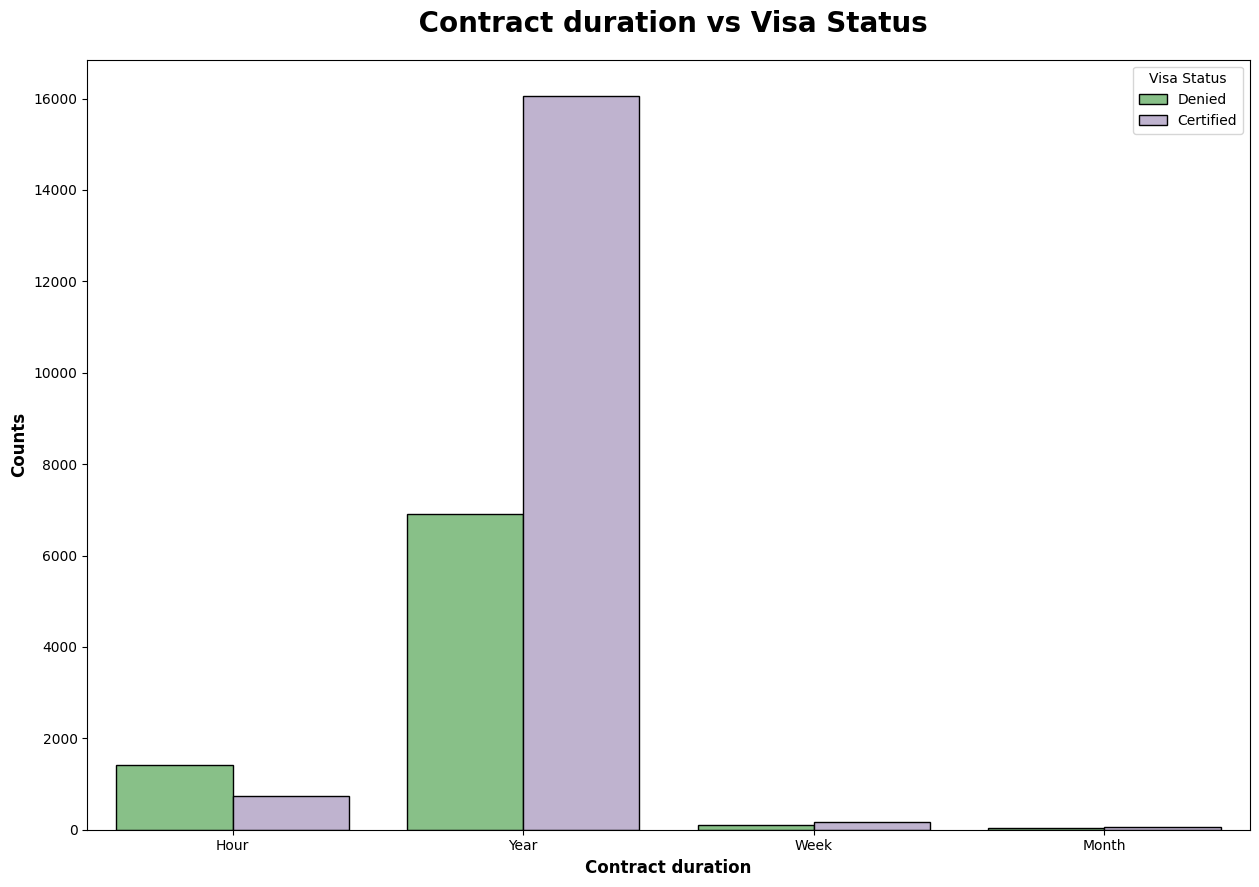

In [44]:
plt.subplots(figsize=(15,10))
sns.countplot(x = "unit_of_wage", hue="case_status", data=df, ec="black", palette="Accent")
plt.title(" Contract duration vs Visa Status", weight="bold", fontsize=20, pad =20)
plt.xlabel("Contract duration",weight="bold",fontsize=12)
plt.ylabel("Counts",weight="bold",fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

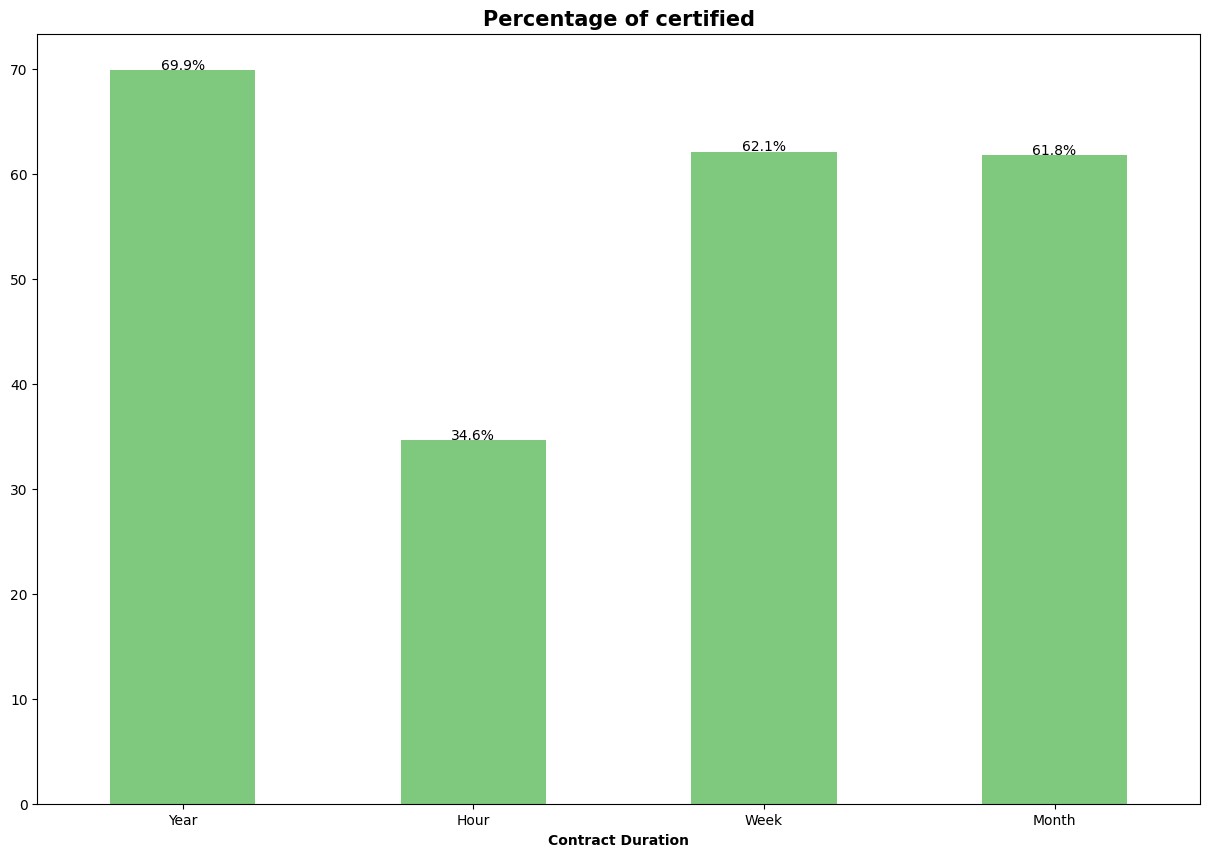

In [45]:
df2 = df.copy()
plt.figure(figsize=(15,10))
(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(kind='bar',stacked=True, colormap="Accent")
plt.title("Percentage of certified", fontsize=15, fontweight="bold")
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel('Contract Duration', fontweight="bold")
plt.xticks(rotation=0)
plt.show()    

## Insights
### 1) Most of applicants are applying for visa are with yearly contract from their employer
### 2) Applicants with yearly contract have the highest chance of getting approval followed by weekly, monthly and hourly

## Does region of employment have anything to do with approval status?

In [46]:
df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

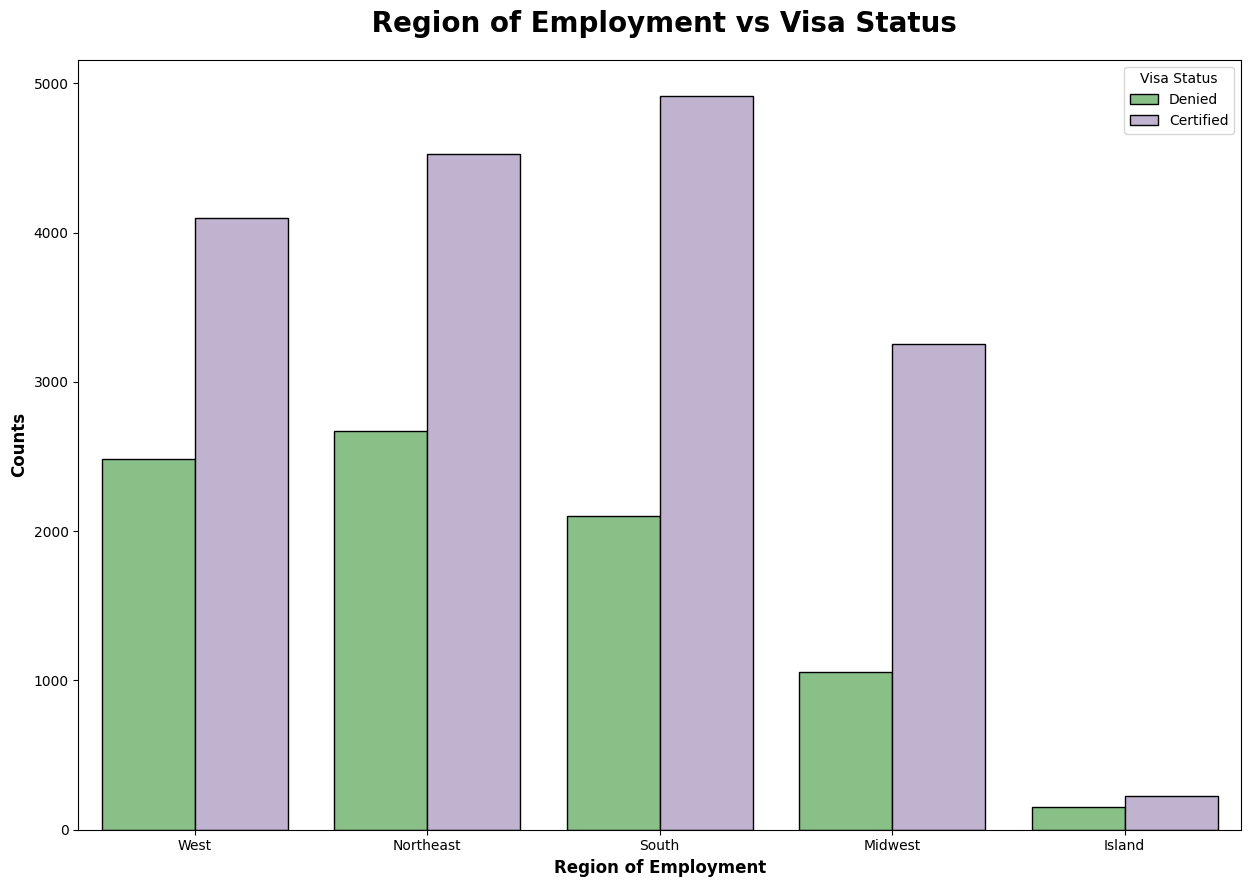

In [47]:
plt.subplots(figsize=(15,10))
sns.countplot(x = "region_of_employment", hue="case_status", data=df, ec="black", palette="Accent")
plt.title(" Region of Employment vs Visa Status", weight="bold", fontsize=20, pad =20)
plt.xlabel("Region of Employment",weight="bold",fontsize=12)
plt.ylabel("Counts",weight="bold",fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

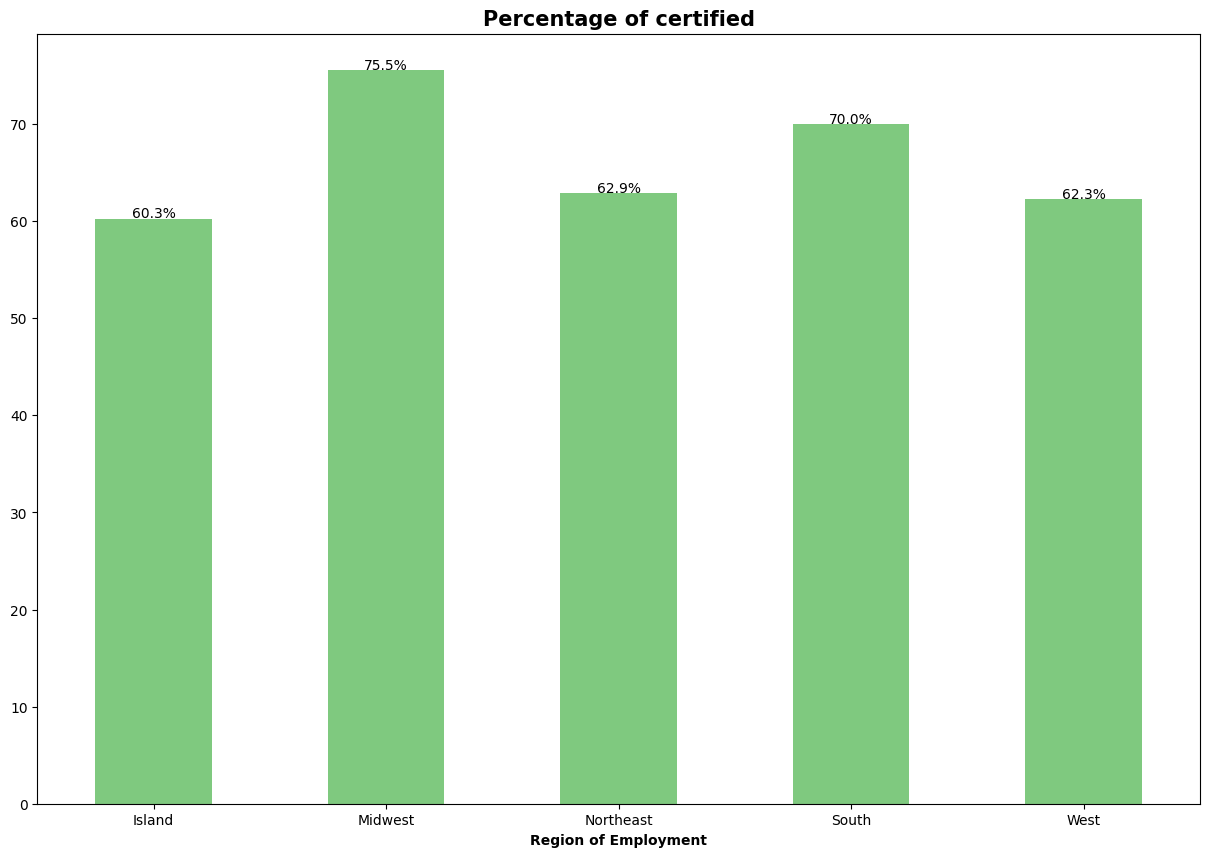

In [48]:
df2 = df.copy()
plt.figure(figsize=(15,10))
(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(kind='bar',stacked=True, colormap="Accent")
plt.title("Percentage of certified", fontsize=15, fontweight="bold")
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha="center")

plt.xlabel('Region of Employment', fontweight="bold")
plt.xticks(rotation=0)
plt.show()   

## Does prevailing wage have any impact on visa approval?

In [49]:
df.groupby('prevailing_wage')['case_status'].value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

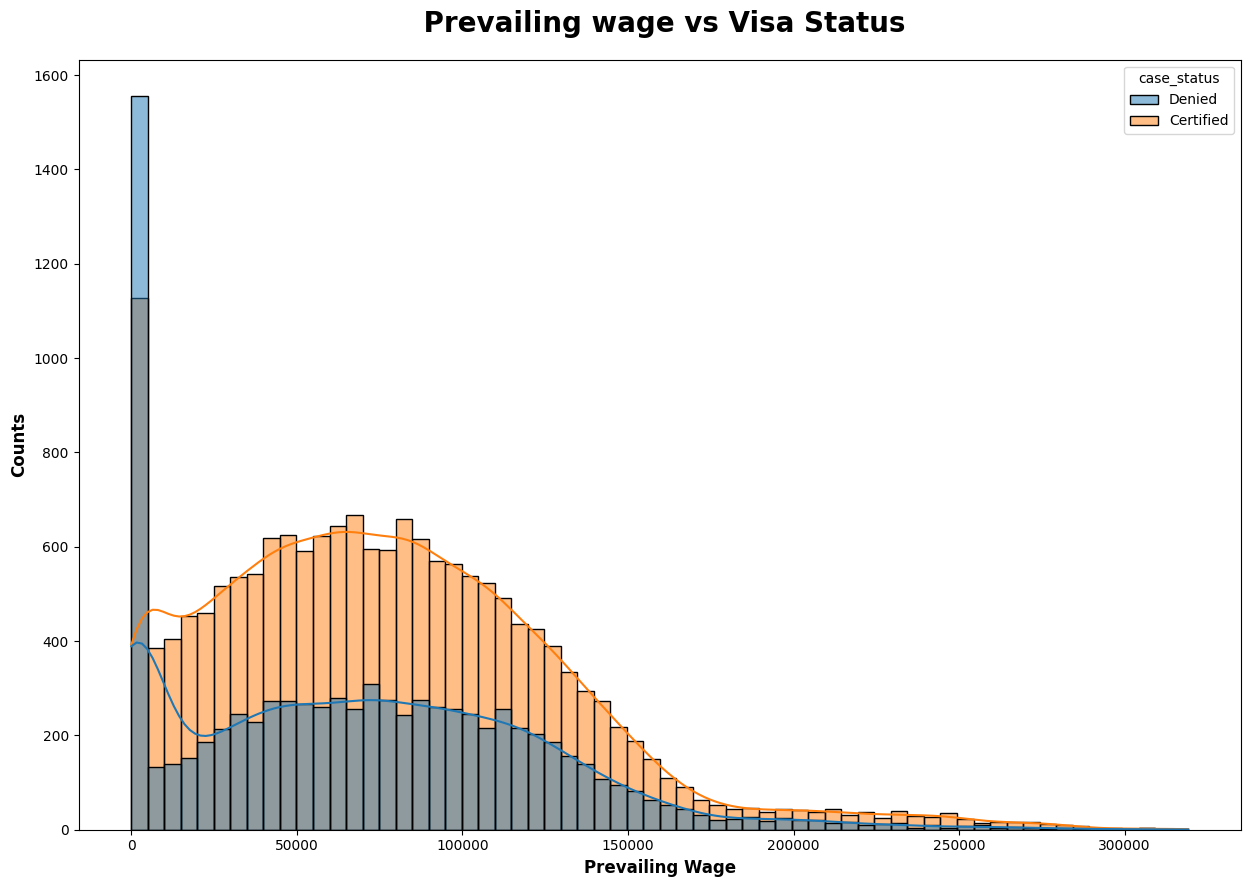

In [52]:
plt.subplots(figsize=(15,10))
sns.histplot(x = "prevailing_wage", hue="case_status", data=df, kde=True)
plt.title(" Prevailing wage vs Visa Status", weight="bold", fontsize=20, pad =20)
plt.xlabel("Prevailing Wage",weight="bold",fontsize=12)
plt.ylabel("Counts",weight="bold",fontsize=12)
#plt.legend(title="Visa Status", fancybox=True)
plt.show()

## Prevailing wage based on Education

In [53]:
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage', ascending=True)

,prevailing_wage
education_of_employee,
Doctorate,64561.076657
High School,71582.147756
Bachelor's,73405.443735
Master's,78843.057843


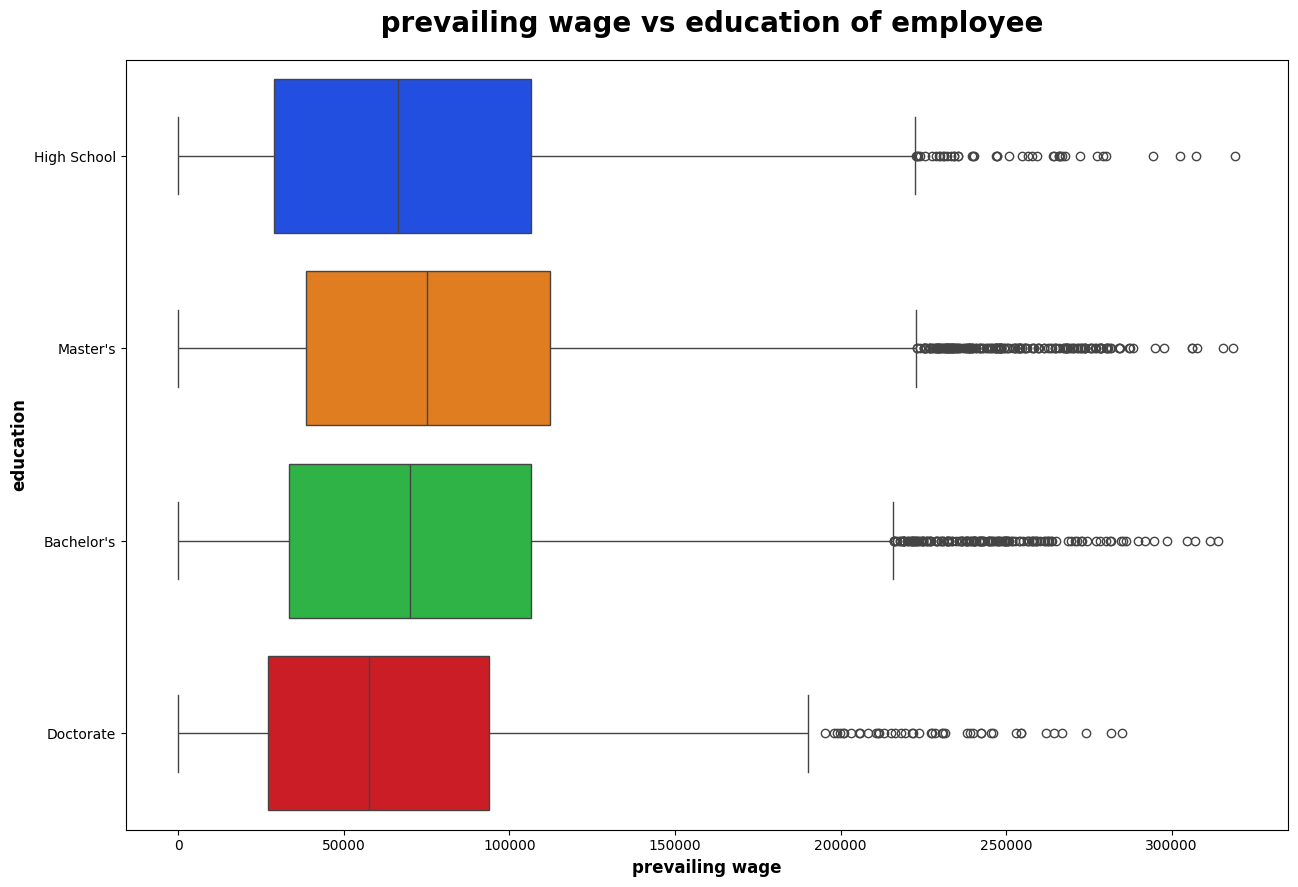

In [56]:
plt.subplots(figsize=(15,10))
sns.boxplot(y = "education_of_employee", x="prevailing_wage", data=df, palette="bright")
plt.title(" prevailing wage vs education of employee", weight="bold", fontsize=20, pad =20)
plt.xlabel("prevailing wage",weight="bold",fontsize=12)
plt.ylabel("education",weight="bold",fontsize=12)
#plt.legend(title="Visa Status", fancybox=True)
plt.show()

## Prevailing wage based on job experience

In [58]:
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


## Final report 
### 1) case_id can be dropped
### 2) requires_job_training can be dropped from chi-squared test
### 3) case_status is imbalanced
### 4) no_of_employees and prevailing wages have outliers should be handled